# **"Deep Learning Approaches for Enhanced American Sign Language Recognition"**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sainandagopal","key":"831cf3469eeb5cc4eaf476f6d2328541"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download rahulmakwana/american-sign-language-recognition

Dataset URL: https://www.kaggle.com/datasets/rahulmakwana/american-sign-language-recognition
License(s): unknown
 91% 43.0M/47.4M [00:00<00:00, 159MB/s]
100% 47.4M/47.4M [00:00<00:00, 151MB/s]


In [6]:
!unzip american-sign-language-recognition

Streaming output truncated to the last 5000 lines.
  inflating: training_set/best of luck/632.png  
  inflating: training_set/best of luck/633.png  
  inflating: training_set/best of luck/634.png  
  inflating: training_set/best of luck/635.png  
  inflating: training_set/best of luck/636.png  
  inflating: training_set/best of luck/637.png  
  inflating: training_set/best of luck/638.png  
  inflating: training_set/best of luck/639.png  
  inflating: training_set/best of luck/64.png  
  inflating: training_set/best of luck/640.png  
  inflating: training_set/best of luck/641.png  
  inflating: training_set/best of luck/642.png  
  inflating: training_set/best of luck/643.png  
  inflating: training_set/best of luck/644.png  
  inflating: training_set/best of luck/645.png  
  inflating: training_set/best of luck/646.png  
  inflating: training_set/best of luck/647.png  
  inflating: training_set/best of luck/648.png  
  inflating: training_set/best of luck/649.png  
  inflating: traini

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import pathlib

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory('/content/training_set',
  validation_split=0.8,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 60352 files belonging to 40 classes.
Using 12071 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory('/content/test_set',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8000 files belonging to 40 classes.
Using 1600 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'best of luck', 'fuck you', 'i love you', 'space']


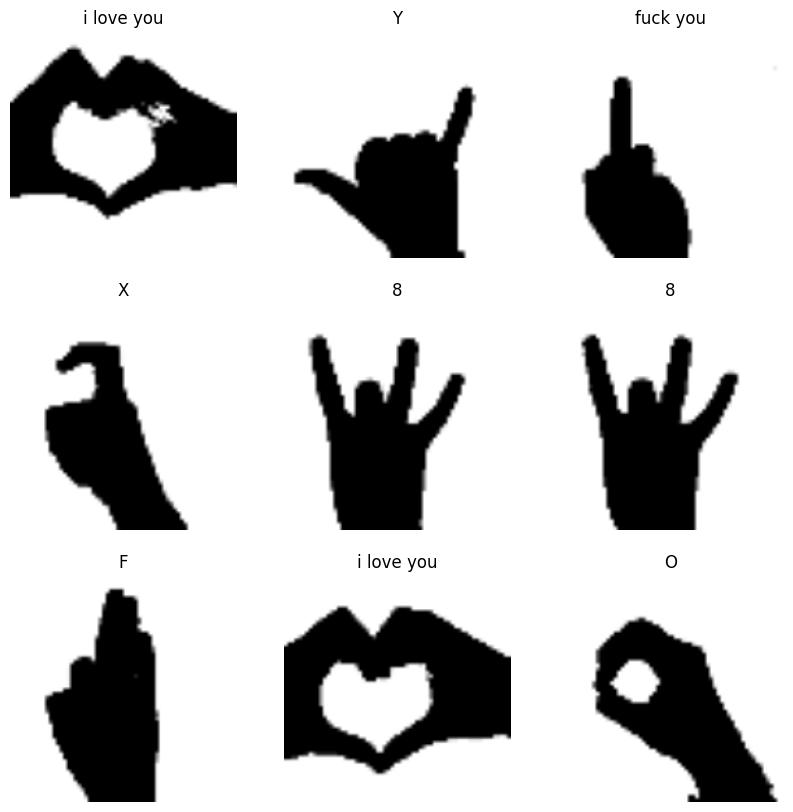

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [13]:
for image_size, labels_size in train_ds:
  print(image_size.shape)
  print(labels_size.shape)
  break

(32, 180, 180, 3)
(32,)


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [20]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
378/378 [==============================] - 14s 23ms/step - loss: 0.2247 - accuracy: 0.9490 - val_loss: 0.0734 - val_accuracy: 0.9869
Epoch 2/20
378/378 [==============================] - 7s 20ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0822 - val_accuracy: 0.9869
Epoch 3/20
378/378 [==============================] - 7s 19ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.2140 - val_accuracy: 0.9875
Epoch 4/20
378/378 [==============================] - 7s 20ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0990 - val_accuracy: 0.9881
Epoch 5/20
378/378 [==============================] - 7s 19ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0745 - val_accuracy: 0.9850
Epoch 6/20
378/378 [==============================] - 7s 19ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.1532 - val_accuracy: 0.9781
Epoch 7/20
378/378 [==============================] - 7s 20ms/step - loss: 0.0103 - accuracy: 0.9983 - val_loss: 0.0938 - val_accuracy: 0.988

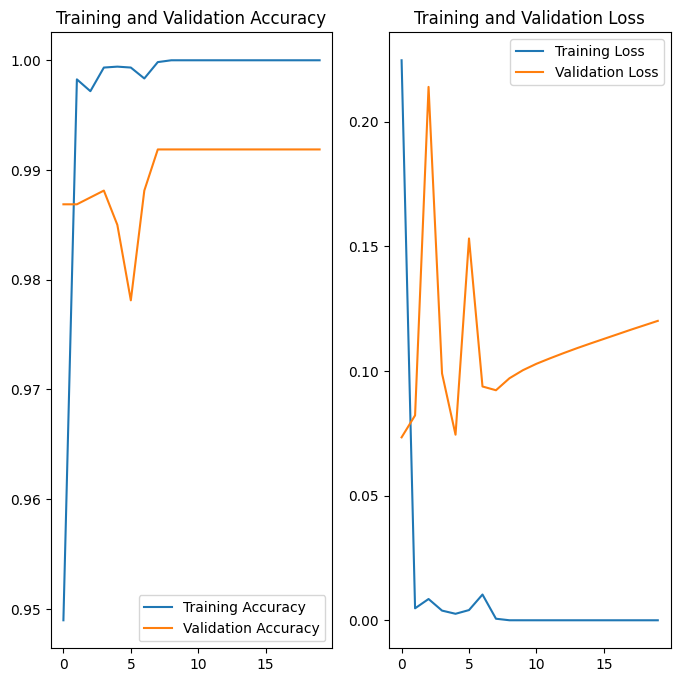

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

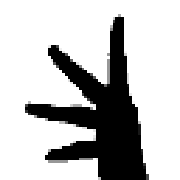

In [22]:

from tensorflow.keras.preprocessing import image

img = image.load_img('/content/test_set/10/102.png',target_size=(img_height,img_width))
img

In [23]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 304ms/step


array([1])

In [24]:
prediction = class_names[result[0]]
prediction

'10'

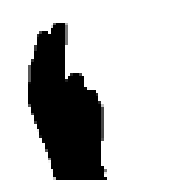

In [25]:
img = image.load_img('/content/test_set/U/109.png',target_size=(img_height,img_width))
img

In [26]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 17ms/step


array([30])

In [27]:
prediction1 = class_names[result[0]]
prediction1

'U'

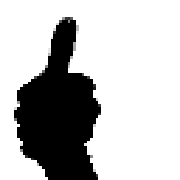

In [28]:
img = image.load_img('/content/test_set/best of luck/102.png',target_size=(img_height,img_width))
img

In [29]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 17ms/step


array([36])

In [30]:
prediction2 = class_names[result[0]]
prediction2

'best of luck'

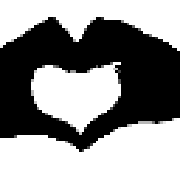

In [31]:
img = image.load_img('/content/test_set/i love you/110.png',target_size=(img_height,img_width))
img

In [32]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 27ms/step


array([38])

In [33]:
prediction3 = class_names[result[0]]
prediction3

'i love you'

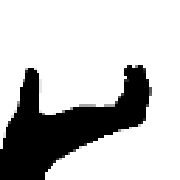

In [34]:
img = image.load_img('/content/test_set/space/104.png',target_size=(img_height,img_width))
img

In [35]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 19ms/step


array([39])

In [36]:
prediction4 = class_names[result[0]]
prediction4

'space'

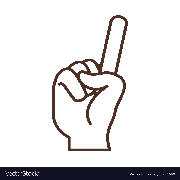

In [104]:
img = image.load_img('/content/ddg.jpg',target_size=(img_height,img_width))
img

In [105]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 19ms/step


array([18])

In [106]:
prediction5 = class_names[result[0]]
prediction5

'I'

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [38]:
test_ds = tf.keras.utils.image_dataset_from_directory('/content/test_set',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 8000 files belonging to 40 classes.
Using 1600 files for validation.


In [39]:
true_labels = []
predicted_labels = []

In [40]:
# Iterate through the test dataset to make predictions
for images, labels in test_ds:
    predicted_batch = model.predict(images)
    predicted_labels.extend(np.argmax(predicted_batch, axis=1))
    true_labels.extend(labels.numpy())

1/1 [==============================] - 0s 24ms/step


In [41]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 17ms/step


array([39])

In [42]:
# Generate a classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
          10       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        43
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        54
           A       1.00      0.97      0.99        38
           B       1.00      1.00      1.00        42
           C       1.00      1.00      1.00        47
           D       1.00      1.00      1.00        37
           E       0.97      1.00      0.99        39
           F       1.00      1.00      1.00        41
           G       1.00      1.00      1.00        45
   

In [43]:
# Compute and display the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[41  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 46 ...  0  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  0 ...  0  0 42]]


# **Transfer Learning**
**Resnet 50**


In [44]:
# Save the model's architecture to a JSON file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [45]:
# Save the model's weights to an HDF5 file
model.save_weights("model_weights.h5")

In [46]:
# Assume that you want to store the model files in your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
# Copy the model files to your Google Drive
!cp model.json "/content/drive/My Drive/"
!cp model_weights.h5 "/content/drive/My Drive/"

In [48]:
# Now, let's simulate a new Colab session and load the model

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
from tensorflow.keras.models import model_from_json

In [50]:
# Load the model's architecture
with open("/content/drive/MyDrive/model.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

In [51]:
# Load the model's weights
loaded_model.load_weights("/content/drive/My Drive/model_weights.h5")

In [52]:
# Compile the model
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [53]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [54]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=9,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(num_classes))

94765736/94765736 [==============================] - 0s 0us/step


In [55]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 128)               262272    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 40)                5160      
 apper)                                                          
                                                                 
Total params: 23855144 (91.00 MB)
Trainable params: 267432 (1.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

In [56]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [57]:
epochs=20
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
378/378 [==============================] - 37s 85ms/step - loss: 0.1926 - accuracy: 0.9653 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 2/20
378/378 [==============================] - 31s 83ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 3/20
378/378 [==============================] - 33s 89ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4/20
378/378 [==============================] - 31s 82ms/step - loss: 8.9174e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/20
378/378 [==============================] - 33s 86ms/step - loss: 5.4320e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/20
378/378 [==============================] - 31s 82ms/step - loss: 3.8375e-04 - accuracy: 1.0000 - val_loss: 9.4647e-04 - val_accuracy: 1.0000
Epoch 7/20
378/378 [==============================] - 31s 82ms/step - loss: 2.5727e-04 - accuracy: 1.0000 - val_loss: 5.

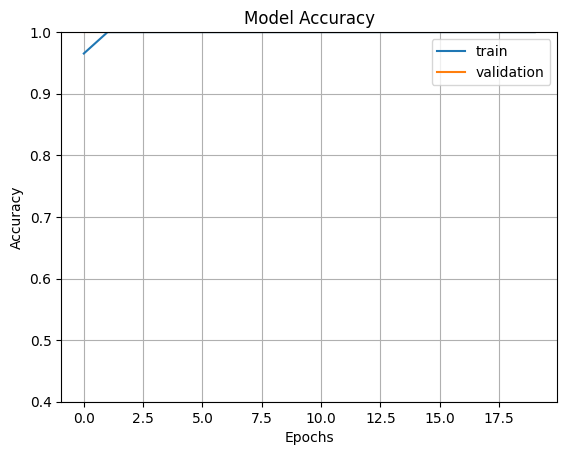

In [58]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

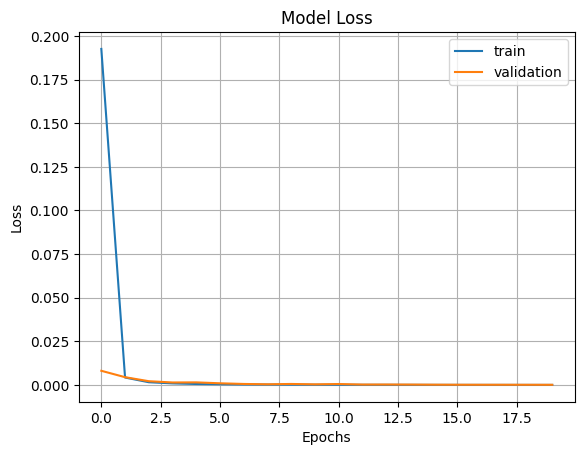

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

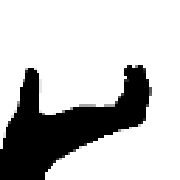

In [62]:
from tensorflow.keras.preprocessing import image

img1 = image.load_img('/content/test_set/space/104.png',target_size=(img_height,img_width))
img1

In [63]:
test_image=image.img_to_array(img1)
test_image=np.expand_dims(test_image, axis = 0)
result =np.argmax(resnet_model.predict(test_image), axis=1)
result

1/1 [==============================] - 2s 2s/step


array([21])

In [64]:
predictions1 = class_names[result[0]]
predictions1

'L'

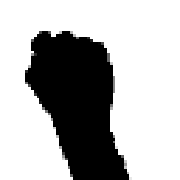

In [65]:
img2 = image.load_img('/content/test_set/S/105.png',target_size=(img_height,img_width))
img2

In [66]:
test_image=image.img_to_array(img2)
test_image=np.expand_dims(test_image, axis = 0)
result =np.argmax(resnet_model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 23ms/step


array([28])

In [67]:
predictions2 = class_names[result[0]]
predictions2

'S'

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [70]:
test_ds = tf.keras.utils.image_dataset_from_directory('/content/test_set',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 8000 files belonging to 40 classes.
Using 1600 files for validation.


In [71]:
true_labels = []
predicted_labels = []

In [72]:
# Iterate through the test dataset to make predictions
for images, labels in test_ds:
    predicted_batch = resnet_model.predict(images)
    predicted_labels.extend(np.argmax(predicted_batch, axis=1))
    true_labels.extend(labels.numpy())

1/1 [==============================] - 0s 27ms/step


In [73]:
# Calculate accuracy
accuracy = metrics.accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [74]:
# Generate a classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
          10       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        43
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        54
           A       1.00      1.00      1.00        38
           B       1.00      1.00      1.00        42
           C       1.00      1.00      1.00        47
           D       1.00      1.00      1.00        37
           E       1.00      1.00      1.00        39
           F       1.00      1.00      1.00        41
           G       1.00      1.00      1.00        45
   

# **VGG16**

In [76]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import glob

# Define IMAGE_SIZE and other parameters
IMAGE_SIZE = [180, 180]
BATCH_SIZE = 32


# Load the pre-trained VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the layers of the pre-trained model
for layer in vgg.layers:
    layer.trainable = False

num_classes = len(class_names)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Scale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the custom top layers
x = Flatten()(vgg.output)
prediction = Dense(num_classes, activation='softmax')(x)

# Create the custom model
vgg_model = Model(inputs=vgg.input, outputs=prediction)

# Compile the model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # You can adjust the learning rate as needed
    metrics=['accuracy']
)

# Load and preprocess your dataset using the datagen
train_ds = datagen.flow_from_directory(
    '/content/training_set',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_ds = datagen.flow_from_directory(
    '/content/test_set',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 60352 images belonging to 40 classes.
Found 8000 images belonging to 40 classes.


In [81]:
epochs=10
history = vgg_model.fit(
    train_ds,
    validation_data=val_ds,
    steps_per_epoch=70,
    epochs=epochs
)

Epoch 1/10
70/70 [==============================] - 95s 1s/step - loss: 0.7884 - accuracy: 0.9134 - val_loss: 0.7549 - val_accuracy: 0.9105
Epoch 2/10
70/70 [==============================] - 96s 1s/step - loss: 0.7072 - accuracy: 0.9152 - val_loss: 0.6609 - val_accuracy: 0.9333
Epoch 3/10
70/70 [==============================] - 95s 1s/step - loss: 0.6225 - accuracy: 0.9348 - val_loss: 0.5919 - val_accuracy: 0.9395
Epoch 4/10
70/70 [==============================] - 94s 1s/step - loss: 0.5694 - accuracy: 0.9384 - val_loss: 0.5395 - val_accuracy: 0.9448
Epoch 5/10
70/70 [==============================] - 97s 1s/step - loss: 0.5259 - accuracy: 0.9482 - val_loss: 0.4891 - val_accuracy: 0.9560
Epoch 6/10
70/70 [==============================] - 94s 1s/step - loss: 0.4734 - accuracy: 0.9469 - val_loss: 0.4526 - val_accuracy: 0.9501
Epoch 7/10
70/70 [==============================] - 96s 1s/step - loss: 0.4297 - accuracy: 0.9571 - val_loss: 0.4240 - val_accuracy: 0.9605
Epoch 8/10
70/70 [==

In [82]:
import matplotlib.pyplot as plt

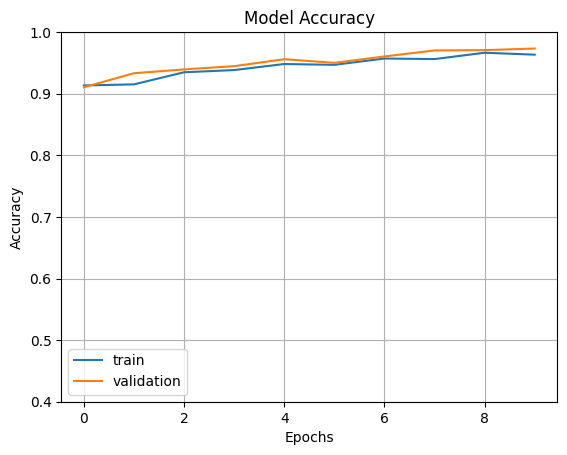

In [83]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

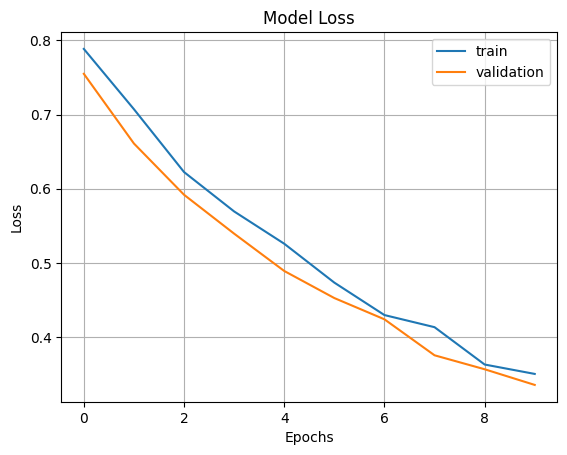

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

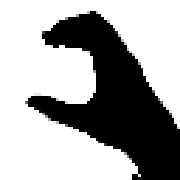

In [88]:
from tensorflow.keras.preprocessing import image

img3 = image.load_img('/content/training_set/C/100.png',target_size=(img_height,img_width))
img3

In [89]:
test_image=image.img_to_array(img3)
test_image=np.expand_dims(test_image, axis = 0)
result =np.argmax(vgg_model.predict(test_image), axis=1)
result

1/1 [==============================] - 1s 1s/step


array([12])

In [90]:
predictions2 = class_names[result[0]]
predictions2

'C'

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [93]:
test_ds = tf.keras.utils.image_dataset_from_directory('/content/test_set',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 8000 files belonging to 40 classes.
Using 1600 files for validation.


In [94]:
true_labels = []
predicted_labels = []

In [95]:
# Iterate through the test dataset to make predictions
for images, labels in test_ds:
    predicted_batch = vgg_model.predict(images)
    predicted_labels.extend(np.argmax(predicted_batch, axis=1))
    true_labels.extend(labels.numpy())

1/1 [==============================] - 0s 24ms/step


In [96]:
# Calculate accuracy
accuracy = metrics.accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8025


In [97]:
# Generate a classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.63      0.76        41
          10       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        46
           3       0.97      1.00      0.99        35
           4       0.32      1.00      0.49        38
           5       1.00      1.00      1.00        30
           6       1.00      0.82      0.90        38
           7       0.00      0.00      0.00        43
           8       1.00      0.32      0.48        44
           9       1.00      1.00      1.00        54
           A       0.97      0.84      0.90        38
           B       1.00      1.00      1.00        42
           C       1.00      1.00      1.00        47
           D       0.97      1.00      0.99        37
           E       1.00      0.23      0.38        39
           F       1.00      0.83      0.91        41
           G       1.00      1.00      1.00        45
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
